# Аналіз та обробка великих даних

Ю.С. Процик. Курс лекцій

# Тема 3. Керування обчислювальними ресурсами та реалізація парадигми MapReduce в Hadoop

### План

1. [Фреймворк Hadoop YARN](#1.-Фреймворк-Hadoop-YARN)

2. [Парадигма MapReduce](#2.-Парадигма-MapReduce)
    
    - [Призначення та сфери застосування](#Призначення-та-сфери-застосування)
    - [Історія розвитку](#Історія-розвитку)
    - [Принцип роботи](#Принцип-роботи)

3. [Основні концепції Hadoop MapReduce](#3.-Основні-концепції-Hadoop-MapReduce)    


### 1. Фреймворк Hadoop YARN

За планування/виконання розподілених програм та керування ресурсами на кластері Hadoop відповідає фреймворк **YARN** – Yet Another Resource Negotiator, що є складовою частиною Apache Hadoop починаючи із версії 2.0. 

Мотивація для його створення є очевидною: є великий кластер і потрібно запускати на ньому якісь задачі, виділяючи кожній необхідні ресурси (обмежуючи та квотуючи), спостерігати за станом задач та обладнання. Працювати під управлінням YARN можуть як MapReduce-програми, так і будь-які інші розподілені програми, що підтримують відповідні програмні інтерфейси.

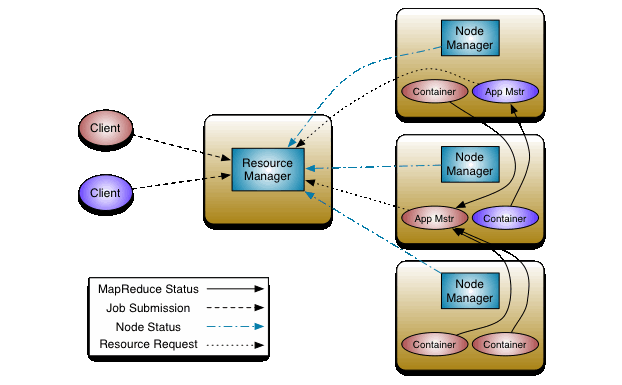

<center>Архітектура YARN</center>

Кластер YARN складається з наступних типів машин:
- **Resource Manager** – керує ресурсами кластера. Кластер має лише один основний Resource Manager;

- **Node Manager** – вузли, які відповідають за запуск задач та застосунків (надають обчислювальні ресурси).

Схема взаємодії компонентів:

1. Клієнт ініціює запуск застосунку та звертається до Resource Manager.

2. Resource Manager виділяє необхідні ресурси на одному з підлеглих вузлів кластера для запуску контейнера з Application Master.

3. Application Master запускається й надалі через Resource Manager може надсилати запити на виділення ресурсів на інших вузлах кластера (з заданим об'ємом доступної пам'яті, кількістю ядер тощо).

Ідея в тому, щоб відокремити дві логічні компоненти в системі розподіленої обробки даних: **Resource Manager** – глобальні ресурси, **Application Master** – ресурси застосунку.

У YARN використовується концепція контейнера (**Container**):

- контейнер – це набір ресурсів, що виділяється з боку Resource Manager на запит;

- контейнер надає права застосунку для використання обмеженої кількості ресурсів;

- всередині контейнера можна запускати будь-яку програму;

- для запуску контейнерів Node Manager використовують специфічні для операційної системи засоби (на Linux можна використовувати Docker);

- ресурсів на всіх може не вистачити – використовується планувальник, запити ставляться у чергу за пріоритетом;

- логіка планувальника може налаштовуватись; 

- Node Manager, Resource Manager мають Web UI, за допомогою якого можна переглядати логи, стежити за задачами тощо.

Якщо кластер працює у великій компанії, але часто виникає проблема спільного використання ресурсів, то застосовуються
планувальники, які можуть налаштовуватися в залежності від конкретних потреб. Основні планувальники:

**FIFO scheduler**

- задачі виконуються в порядку черги
- немає поняття пріоритету
- не рекомендовано до використання

**Fair scheduler**

- розроблений компанією Facebook
- намагається розподілити ресурси таким чином, щоб усі запущені застосунки отримали однакову частку ресурсів
- є набір пулів, кожна задача розподіляється у певний пул
- кожному пулу може належати певна кількість ресурсів
- кожен користувач прикріплюється до одного пулу, він може використовувати ресурси лише з цього пулу
- дозволяє адміністратору налаштовувати доступну кількість ресурсів

**Сapacity scheduler**

- розроблений компанією Yahoo
- призначається для великих кластерів
- дозволяє налаштовувати кількість ресурсів для кожного користувача
- використовується черга задач із пріоритетами

### 2. Парадигма MapReduce

**MapReduce** — це модель програмування та фреймворк, що її реалізує, розроблені компанією Google для проведення розподіленої паралельної обробки великих масивів даних з використанням кластерів звичайних недорогих комп'ютерів. 

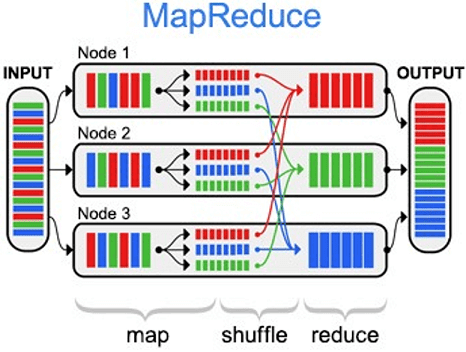

#### Призначення та сфери застосування

MapReduce можна назвати головною технологією Big Data, оскільки вона з самого початку орієнтована на паралельні обчислення у розподілених кластерах. Суть MapReduce полягає у поділі масиву даних на частини, паралельній обробці кожної частини на окремому вузлі та фінального об'єднанні всіх результатів.

Програми, що використовують MapReduce, автоматично розпаралелюються та виконуються на розподілених вузлах кластера, при цьому виконавча система сама піклується про деталі реалізації (розбиття вхідних даних на частини, розподіл задач по вузлах кластера, обробка збоїв тощо). Завдяки цьому програмісти можуть легко та ефективно використовувати ресурси розподілених Big Data систем.

Технологія практично універсальна: вона може використовуватися для індексації веб-контенту, підрахунку слів у великому файлі, лічильників частоти звернень до заданої адреси, обчислення обсягу всіх веб-сторінок з кожної URL-адреси конкретного хост-вузла, створення списку всіх адрес з необхідними даними та інших задач обробки великих масивів розподіленої інформації. Також до областей застосування MapReduce відноситься розподілений пошук та сортування даних, обробка статистики логів мережі, побудова інвертованих індексів, кластеризація документів, машинне навчання та статистичний машинний переклад. Крім того, MapReduce адаптована під багатопроцесорні системи, добровільні обчислювальні, динамічні хмарні та мобільні середовища.

#### Історія розвитку

Авторами цієї обчислювальної моделі вважаються співробітники Google Джеффрі Дін (Jeffrey Dean) і Санджай Гемават (Sanjay Ghemawat) ([MapReduce: Simplified Data Processing on Large Clusters](https://research.google.com/archive/mapreduce-osdi04-slides/index.html)), які взяли за основу дві процедури функціонального програмування: `map`, що застосовує потрібну функцію до кожного елемента списку, і `reduce`, що об'єднує результати роботи. У процесі обчислення множина вхідних пар ключ/значення перетворюється на множину вихідних пар ключ/значення. 

Спочатку назва MapReduce була запатентована корпорацією Google, але з розвитком технологій Big Data стала загальним поняттям світу великих даних. Сьогодні безліч різних комерційних, і вільних продуктів, використовують цю модель розподілених обчислень: Apache Hadoop, Apache CouchDB, MongoDB, MySpace Qizmt та інші Big Data фреймворки і бібліотеки, написані різними мовами програмування. Серед інших найбільш відомих реалізацій MapReduce варто відзначити такі:

- Greenplum – комерційна реалізація з підтримкою мов Python, Perl, SQL та ін;

- GridGain – безкоштовна реалізація з відкритим вихідним кодом на мові Java;

- MapReduce реалізована у графічних процесорах NVIDIA з використанням CUDA;

- Qt Concurrent – спрощена версія фреймворку, реалізована на C++, для розподілу задачі між кількома ядрами одного комп'ютера;

- CouchDB використовує MapReduce для визначення представлень поверх розподілених документів;

- Skynet – реалізація з відкритим вихідним кодом мовою Ruby;

- Disco — реалізація від компанії Nokia, ядро якої написане мовою Erlang, а програми можна розробляти на Python;

- Hive framework — надбудова з відкритим вихідним кодом від Facebook, що дозволяє комбінувати підхід MapReduce та доступ до даних SQL-подібною мовою;

- Qizmt - реалізація з відкритим вихідним кодом від MySpace, написана на C#;

- DryadLINQ – реалізація від Microsoft Research на основі PLINQ та Dryad.

#### Принцип роботи

Насамперед, ще раз пояснимо сенс основних функцій обчислювальної моделі:

- **map** приймає на вхід список значень та деяку функцію, яку потім застосовує до кожного елемента списку та повертає новий список;

- **reduce** (згортка) – перетворює список до єдиного атомарного значення за допомогою заданої функції, якій на кожній ітерації передаються новий елемент списку та проміжний результат.

Для обробки даних відповідно до обчислювальної моделі MapReduce слід визначити обидві ці функції. MapReduce передбачає, що дані організовані у вигляді деяких записів.

Сама обчислювальна модель складається з 3-крокової комбінації вищенаведених функцій:

1. **Map** – попередня обробка вхідних даних у вигляді великого списку значень. При цьому головний вузол кластера (master node) отримує цей список, ділить його на частини та передає робочим вузлам (worker node). Далі кожен робочий вузол застосовує функцію Map до локальних даних та записує результат у форматі ключ/значення у тимчасове сховище.

2. **Shuffle** – робочі вузли перерозподіляють дані на основі ключів, раніше створених функцією Map, таким чином, щоб всі дані одного ключа лежали на одному робочому вузлі.

3. **Reduce** – паралельна обробка кожним робочим вузлом кожної групи даних по порядку проходження ключів та «склейка» результатів на master node. Головний вузол отримує проміжні відповіді від робочих вузлів і передає їх у вільні вузли до виконання наступного кроку. Результат, що вийшов після проходження всіх необхідних кроків – це і є рішення вихідної задачі.

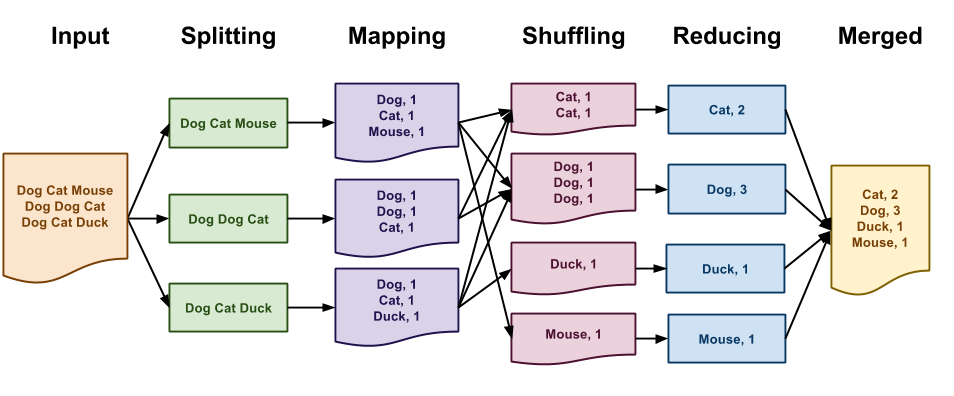

<center>Процес підрахунку слів з використанням моделі програмування MapReduce</center>

### 3. Основні концепції Hadoop MapReduce

Apache Hadoop реалізує парадигму MapReduce, дозволяючи паралельно обробляти величезна кількість даних на кластері, по можливості мінімізуючи мережеві операції та приховуючи особливості імплементації від програміста. При цьому:

- досягається автоматичне розпаралелювання та розподіл коду/даних по кластеру;

- пропонуються утиліти моніторингу виконання задачі;

- розробник повинен просто реалізувати дві функції: `map` і `reduce`;

- Data Locality – дані по можливості обробляються на тому вузлі кластера, де вони зберігаються;

- вхідні та вихідні дані зберігаються в HDFS;

- виконання задачі стійке до відмов обладнання.

Дамо основні визначення:

**Job** – процес виконання конкретної задачі на конкретному наборі даних, з конкретними функціями `map` та `reduce`.

**Task** – запуск якоїсь підзадачі (`Mapper` – виконує функцію `map` або `Reducer` – виконує функцію `reduce`) на якійсь певній частині даних.

**Task Attempt** – спроба запуску Task. Hadoop може запускати одну задачу на виконання декілька разів. Це відбувається, якщо попередня спроба не завершилася успіхом або повільно працює (speculative execution).

**InputFormat** – те, як повинні інтерпретуватися дані у вхідному файлі в HDFS, перед тим, як вони потраплять до `Mapper`'а, якому потрібні пари ключ/значення. За замовчуванням використовується TextInputFormat, який інтерпретує вхідний файл як текстовий файл. Це актуально під час написання програми на Javа. Крім того, InputFormat визначає, як вхідні дані діляться на незалежні частини.

**OutputFormat** – те, як пари ключ/значення після роботи `Reducer`'a повинні записуватись в HDFS (насправді не обов'язково в HDFS). За замовчуванням використовується TextOutputFormat, який записує пари ключ/значення у текстовому вигляді.

**Combiner** – опціональна функція, схожа на `Reducer`. Найчастіше застосовується для оптимізації обчислень, коли функція `reduce` комутативна (𝑎 ∘ 𝑏 = 𝑏 ∘ 𝑎) і асоціативна ((𝑎 ∘ 𝑏) ∘ 𝑐 = 𝑎 ∘ (𝑏 ∘ 𝑐)). Ідея у тому, що ми можемо застосувати операцію `reduce` на частині даних на тих же вузлах, на яких запускалися `Mapper`и, коли вони ще не згруповані. Якщо це можливо, це прискорить обчислення.

**Partitioner** – опціональна функція, яка ділить простір ключів. Ця функція виконується на кожному ключі після виконання `Mapper`'а, від результату залежить в який `Reducer` (їх кількість відома) потраплять дані, асоційовані з ключем. За замовчуванням використовується хеш-функція. Іноді потрібно задати користувацький `Partitioner` це може бути пов'язано з особливостями алгоритмів або для підвищення продуктивності, щоб перерозподілити навантаження на вузли, що виконують функції `reduce`.

**Secondary Sort** – MapReduce сортує записи за ключами перед тим, як вони потраплять у `Reducer`'и. Але список значень для конкретного ключа не є відсортованим. Іноді значення потрібно отримати у відсортованому вигляді. Цей процес опціональний і називається вторинним сортуванням, його можна імплементувати самостійно, використовуючи композитний ключ.

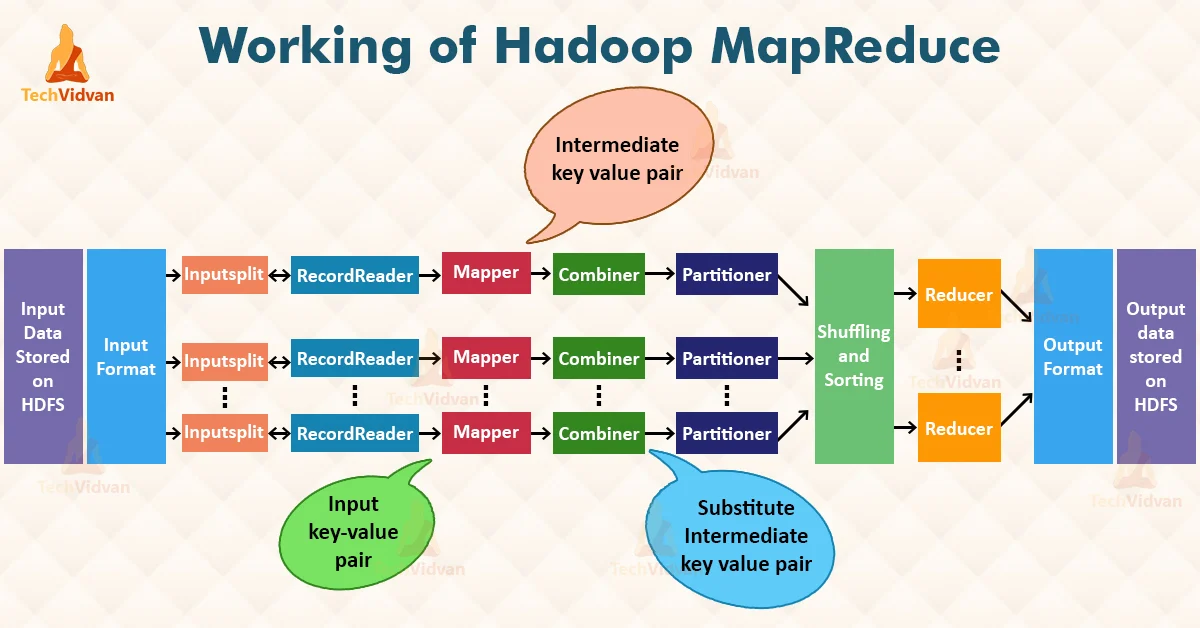

<center>Стадії виконання MapReduce-задачі</center>

Життєвий цикл Job виглядає приблизно так, при цьому опускаються технічні деталі, пов'язані із взаємодією з YARN. Число паралельних процесів, що виконують `map` і `reduce`, визначаються користувачем або автоматично до виконання завдання.

1. Hadoop аналізує вихідні дані, ділить їх на частини – `splits`.

2. Hadoop визначає, на яких машинах будуть виконуватися мапери (`Mapper`) і переносить на них код і дані.

3. Hadoop виконує мапери (`Mapper`) на кожному спліті. В ідеальному випадку це має відбуватися одночасно.

4. Після виконання `Mapper` відбувається групування та сортування даних за ключем.

5. Опціонально, якщо він заданий користувачем, виконується `Combiner`.

6. Відбувається процес, який називається `shuffling`. В цей момент дані перерозподіляються між вузлами, які беруть участь
у виконанні Job. Усі дані з однаковим ключем мають потрапити на одну машину. На цьому етапі відбуваються важкі мережеві операції.

7. Після копіювання даних вони групуються за ключем та запускається `Reducer`.

8. Результат записується в HDFS, при цьому по можливості мережеві операції зведені до мінімуму. Використовується DataNode,
на якому виконується процес `Reducer`'a. Далі HDFS автоматично досягає необхідного ступеня реплікації.